<a href="https://colab.research.google.com/github/aymenchibouti/newversion/blob/master/anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# Step 1: Load dataset
df = pd.read_csv("model1_210_features.csv")

# Step 2: Prepare features and target
X = df.drop(columns=['dropout', 'username', 'course_id'])  # drop non-numeric identifiers
y = df['dropout']

# Step 3: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Select top 30 features using ANOVA F-score
selector = SelectKBest(score_func=f_classif, k=30)
X_selected = selector.fit_transform(X_scaled, y)

# Step 5: Get selected feature names
selected_feature_names = X.columns[selector.get_support()].tolist()

# Step 6: Create new DataFrame with selected features + target
selected_df = df[selected_feature_names + ['dropout']]

# Step 7: Save to CSV
output_path = "top_30_features_selected.csv"
selected_df.to_csv(output_path, index=False)

# Step 8: Print selected features
print("Top 30 Selected Features:")
for feature in selected_feature_names:
    print(f"- {feature}")

print(f"\n✅ Selected features saved to: {output_path}")


Top 30 Selected Features:
- day_1_access
- day_1_navigate
- day_1_page_close
- day_1_video
- day_2_navigate
- day_2_page_close
- day_3_navigate
- day_6_navigate
- day_7_access
- day_7_navigate
- day_7_page_close
- day_8_access
- day_8_navigate
- day_8_page_close
- day_9_navigate
- day_14_navigate
- day_15_access
- day_15_navigate
- day_15_page_close
- day_17_navigate
- day_18_navigate
- day_19_navigate
- day_20_navigate
- day_21_navigate
- day_22_navigate
- day_22_page_close
- day_23_access
- day_23_navigate
- day_24_navigate
- enrollment_id

✅ Selected features saved to: top_30_features_selected.csv


In [4]:
df_anova = pd.read_csv("top_30_features_selected.csv")

In [5]:
df_anova

,day_1_access,day_1_navigate,day_1_page_close,day_1_video,day_2_navigate,day_2_page_close,day_3_navigate,day_6_navigate,day_7_access,day_7_navigate,...,day_19_navigate,day_20_navigate,day_21_navigate,day_22_navigate,day_22_page_close,day_23_access,day_23_navigate,day_24_navigate,enrollment_id,dropout
0,3,1,1,0,0,0,0,0,0,0,...,0,3,1,0,0,0,0,0,1,0
1,7,4,2,1,0,0,0,0,11,1,...,1,0,0,0,0,12,1,0,3,0
2,18,4,2,2,0,0,0,0,7,3,...,0,0,0,0,0,0,0,0,4,0
3,0,2,0,0,8,13,1,0,0,0,...,0,0,0,1,5,34,4,1,5,0
4,12,5,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120537,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,200898,1
120538,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,200900,1
120539,3,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,200901,1
120540,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,200904,1


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# Step 1: Load the dataset with top 30 features
df = pd.read_csv("top_30_features_selected.csv")

# Step 2: Split features and target
X = df.drop(columns=['dropout'])
y = df['dropout']

# Step 3: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 4: Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 5: Train AdaBoost model on balanced data
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train_smote, y_train_smote)

# Step 6: Predict on test set
y_pred = ada_model.predict(X_test)

# Step 7: Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Step 8: Output results
print("📊 Confusion Matrix:\n", conf_matrix)
print("\n🔍 Classification Report:\n", class_report)
print(f"\n✅ Accuracy: {accuracy:.4f}")


📊 Confusion Matrix:
 [[ 3418  1574]
 [ 3703 15414]]

🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.68      0.56      4992
           1       0.91      0.81      0.85     19117

    accuracy                           0.78     24109
   macro avg       0.69      0.75      0.71     24109
weighted avg       0.82      0.78      0.79     24109


✅ Accuracy: 0.7811


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Load the dataset with top 30 features
df = pd.read_csv("top_30_features_selected.csv")

# Step 2: Split features and target
X = df.drop(columns=['dropout'])
y = df['dropout']

# Step 3: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 4: Train AdaBoost model on original (imbalanced) data
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

# Step 5: Predict on test set
y_pred = ada_model.predict(X_test)

# Step 6: Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Step 7: Output results
print("📊 Confusion Matrix:\n", conf_matrix)
print("\n🔍 Classification Report:\n", class_report)
print(f"\n✅ Accuracy: {accuracy:.4f}")


📊 Confusion Matrix:
 [[ 1913  3079]
 [  617 18500]]

🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.38      0.51      4992
           1       0.86      0.97      0.91     19117

    accuracy                           0.85     24109
   macro avg       0.81      0.68      0.71     24109
weighted avg       0.84      0.85      0.83     24109


✅ Accuracy: 0.8467


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:20:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📊 Confusion Matrix:
 [[ 2354  2638]
 [  947 18170]]

🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.47      0.57      4992
           1       0.87      0.95      0.91     19117

    accuracy                           0.85     24109
   macro avg       0.79      0.71      0.74     24109
weighted avg       0.84      0.85      0.84     24109


✅ Accuracy: 0.8513


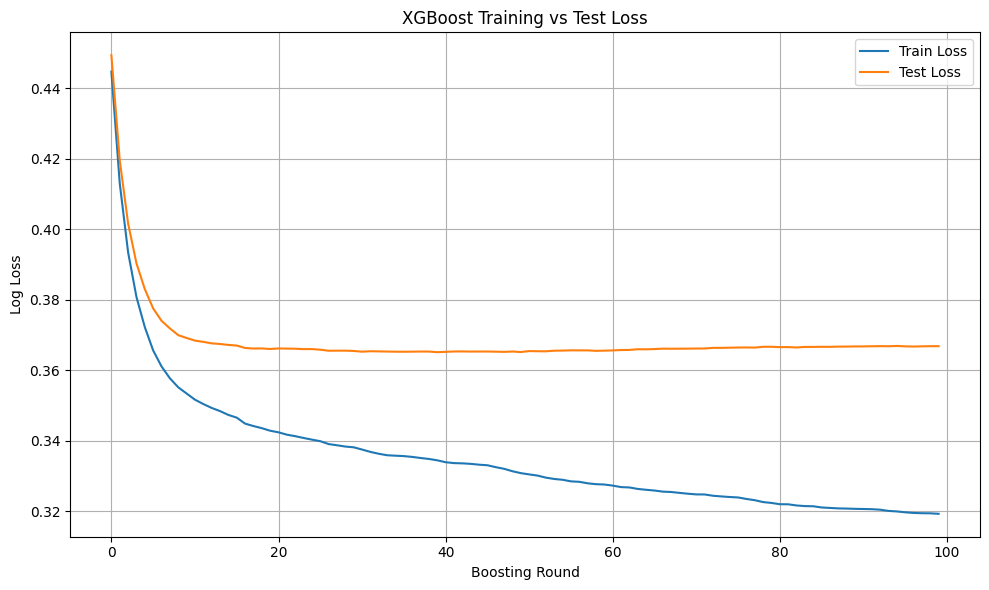

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

# Step 1: Load the dataset
df = pd.read_csv("top_30_features_selected.csv")

# Step 2: Prepare features and target
X = df.drop(columns=['dropout'])
y = df['dropout']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 4: Train the XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=False
)

# Step 5: Evaluate the model
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Step 6: Display metrics
print("📊 Confusion Matrix:\n", conf_matrix)
print("\n🔍 Classification Report:\n", class_report)
print(f"\n✅ Accuracy: {accuracy:.4f}")

# Step 7: Plot training and test loss
results = xgb_model.evals_result()
train_loss = results['validation_0']['logloss']
test_loss = results['validation_1']['logloss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Boosting Round')
plt.ylabel('Log Loss')
plt.title('XGBoost Training vs Test Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:22:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📊 Confusion Matrix:
 [[ 3325  1667]
 [ 2825 16292]]

🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.67      0.60      4992
           1       0.91      0.85      0.88     19117

    accuracy                           0.81     24109
   macro avg       0.72      0.76      0.74     24109
weighted avg       0.83      0.81      0.82     24109


✅ Accuracy: 0.8137


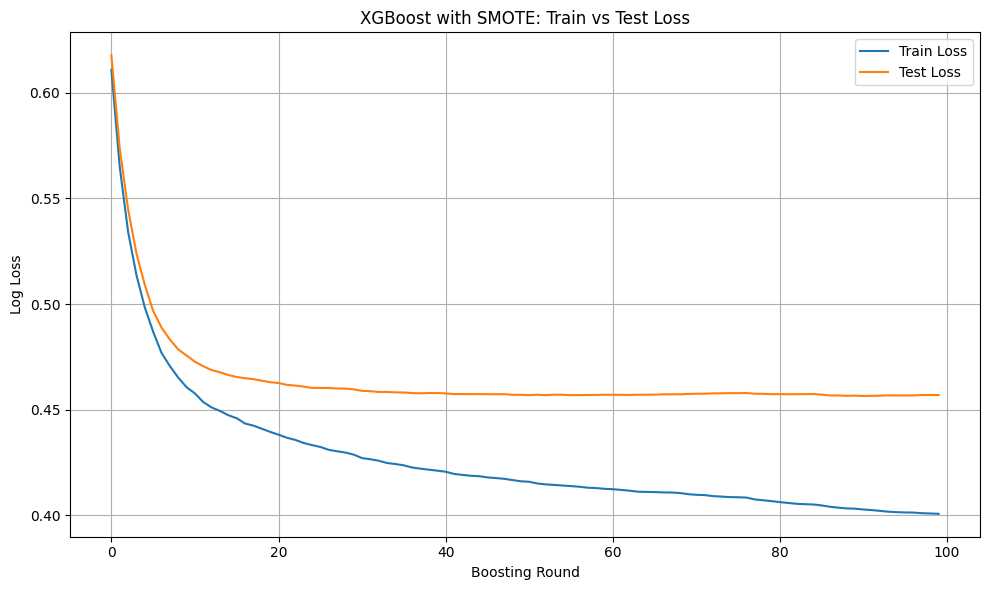

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Step 1: Load dataset
df = pd.read_csv("top_30_features_selected.csv")

# Step 2: Split features and target
X = df.drop(columns=['dropout'])
y = df['dropout']

# Step 3: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 4: Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 5: Train XGBoost on balanced data
xgb_model = XGBClassifier(
    n_estimators=100,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(
    X_train_smote, y_train_smote,
    eval_set=[(X_train_smote, y_train_smote), (X_test, y_test)],
    verbose=False
)

# Step 6: Predict and evaluate
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Step 7: Output results
print("📊 Confusion Matrix:\n", conf_matrix)
print("\n🔍 Classification Report:\n", class_report)
print(f"\n✅ Accuracy: {accuracy:.4f}")

# Step 8: Plot training and test loss
results = xgb_model.evals_result()
train_loss = results['validation_0']['logloss']
test_loss = results['validation_1']['logloss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Boosting Round')
plt.ylabel('Log Loss')
plt.title('XGBoost with SMOTE: Train vs Test Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:24:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📊 Confusion Matrix:
 [[ 3521  1471]
 [ 3581 15536]]

🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.71      0.58      4992
           1       0.91      0.81      0.86     19117

    accuracy                           0.79     24109
   macro avg       0.70      0.76      0.72     24109
weighted avg       0.83      0.79      0.80     24109


✅ Accuracy: 0.7905


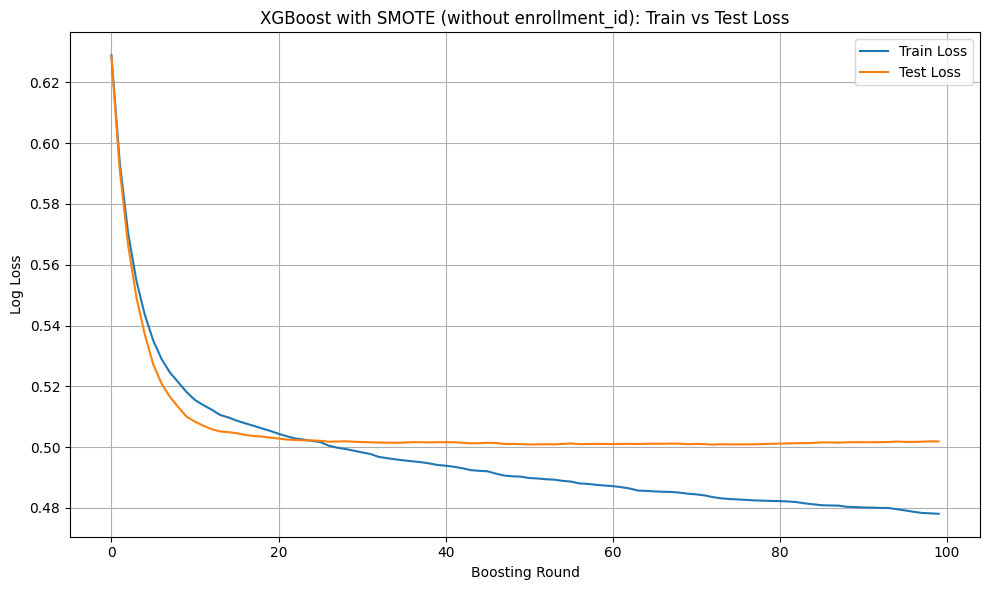

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Step 1: Load dataset
df = pd.read_csv("top_30_features_selected.csv")

# Step 2: Drop 'enrollment_id' if it exists
if 'enrollment_id' in df.columns:
    df = df.drop(columns=['enrollment_id'])

# Step 3: Separate features and target
X = df.drop(columns=['dropout'])
y = df['dropout']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 5: Apply SMOTE to balance training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 6: Train XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(
    X_train_smote, y_train_smote,
    eval_set=[(X_train_smote, y_train_smote), (X_test, y_test)],
    verbose=False
)

# Step 7: Evaluate model
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Step 8: Print results
print("📊 Confusion Matrix:\n", conf_matrix)
print("\n🔍 Classification Report:\n", class_report)
print(f"\n✅ Accuracy: {accuracy:.4f}")

# Step 9: Plot train vs test loss
results = xgb_model.evals_result()
train_loss = results['validation_0']['logloss']
test_loss = results['validation_1']['logloss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Boosting Round')
plt.ylabel('Log Loss')
plt.title('XGBoost with SMOTE (without enrollment_id): Train vs Test Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Step 1: Load dataset
df = pd.read_csv("top_30_features_selected.csv")

# Step 2: Drop 'enrollment_id' if exists
if 'enrollment_id' in df.columns:
    df = df.drop(columns=['enrollment_id'])

# Step 3: Features and target
X = df.drop(columns=['dropout'])
y = df['dropout']

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 5: Apply SMOTE to balance training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 6: Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Step 7: Predict and evaluate
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Step 8: Display results
print("📊 Confusion Matrix:\n", conf_matrix)
print("\n🔍 Classification Report:\n", class_report)
print(f"\n✅ Accuracy: {accuracy:.4f}")


📊 Confusion Matrix:
 [[ 3335  1657]
 [ 3424 15693]]

🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.67      0.57      4992
           1       0.90      0.82      0.86     19117

    accuracy                           0.79     24109
   macro avg       0.70      0.74      0.71     24109
weighted avg       0.82      0.79      0.80     24109


✅ Accuracy: 0.7892


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Load dataset
df = pd.read_csv("top_30_features_selected.csv")

# Step 2: Drop 'enrollment_id' if exists
if 'enrollment_id' in df.columns:
    df = df.drop(columns=['enrollment_id'])

# Step 3: Features and target
X = df.drop(columns=['dropout'])
y = df['dropout']

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 5: Train Random Forest (original imbalanced data)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Step 7: Display results
print("📊 Confusion Matrix:\n", conf_matrix)
print("\n🔍 Classification Report:\n", class_report)
print(f"\n✅ Accuracy: {accuracy:.4f}")


📊 Confusion Matrix:
 [[ 2489  2503]
 [ 1316 17801]]

🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.50      0.57      4992
           1       0.88      0.93      0.90     19117

    accuracy                           0.84     24109
   macro avg       0.77      0.71      0.73     24109
weighted avg       0.83      0.84      0.83     24109


✅ Accuracy: 0.8416


deepseek

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

# Load data
data = pd.read_csv('top_30_features_selected.csv')

# Separate features and target
X = data.drop(['enrollment_id', 'dropout'], axis=1)
y = data['dropout']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train_res)

# Evaluate
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.49      0.68      0.57      5061
           1       0.90      0.82      0.86     19048

    accuracy                           0.79     24109
   macro avg       0.70      0.75      0.72     24109
weighted avg       0.82      0.79      0.80     24109

ROC-AUC: 0.79830940206922


In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler, PowerTransformer
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Load data
data = pd.read_csv('top_30_features_selected.csv')

# Feature engineering - create temporal aggregates
def create_temporal_features(df):
    # Weekly aggregates
    for action in ['access', 'navigate', 'page_close', 'video']:
        cols = [c for c in df.columns if action in c]
        df[f'weekly_{action}_total'] = df[cols].sum(axis=1)
        df[f'weekly_{action}_std'] = df[cols].std(axis=1)

    # Engagement ratios
    df['video_per_access'] = df['weekly_video_total'] / (df['weekly_access_total'] + 1e-6)
    df['actions_per_day'] = df.filter(like='day_').sum(axis=1) / 24  # Approximate days

    return df

data = create_temporal_features(data)

# Separate features and target
X = data.drop(['enrollment_id', 'dropout'], axis=1)
y = data['dropout']

# Advanced preprocessing pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify numeric columns (all in this case)
numeric_cols = X.columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', RobustScaler()),  # Less sensitive to outliers
            ('transform', PowerTransformer(method='yeo-johnson'))  # Handle skewness
        ]), numeric_cols)
    ])

# Feature selection
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # Can tune k

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import RobustScaler, PowerTransformer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
import joblib
import shap
import matplotlib.pyplot as plt

## 1. Data Loading and Preparation
def load_and_prepare_data(filepath):
    """Load data and create temporal features"""
    data = pd.read_csv(filepath)

    # Feature engineering
    for action in ['access', 'navigate', 'page_close', 'video']:
        cols = [c for c in data.columns if action in c]
        data[f'weekly_{action}_total'] = data[cols].sum(axis=1)
        data[f'weekly_{action}_std'] = data[cols].std(axis=1)

    data['video_per_access'] = data['weekly_video_total'] / (data['weekly_access_total'] + 1e-6)
    data['actions_per_day'] = data.filter(like='day_').sum(axis=1) / 24

    # Separate features and target
    X = data.drop(['enrollment_id', 'dropout'], axis=1)
    y = data['dropout']

    return X, y

## 2. Preprocessing Pipeline
def create_preprocessing_pipeline():
    """Create robust preprocessing pipeline"""
    numeric_transformer = Pipeline(steps=[
        ('scaler', RobustScaler()),
        ('power', PowerTransformer(method='yeo-johnson'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, X.columns.tolist())
        ])

    return preprocessor

## 3. Model Training with Error Handling
def train_models(X, y):
    """Train and evaluate multiple models with error handling"""
    # Initialize models with safe parameters
    models = {
        'XGBoost': XGBClassifier(
            random_state=42,
            eval_metric='logloss',
            n_estimators=100,
            max_depth=3,
            learning_rate=0.1
        ),
        'RandomForest': RandomForestClassifier(
            random_state=42,
            n_estimators=100,
            max_depth=5
        ),
        'LightGBM': LGBMClassifier(
            random_state=42,
            n_estimators=100,
            max_depth=3,
            learning_rate=0.1
        )
    }

    # Common pipeline steps
    preprocessor = create_preprocessing_pipeline()
    selector = SelectKBest(score_func=mutual_info_classif, k=20)

    results = []
    trained_models = {}

    for name, model in models.items():
        try:
            # Create pipeline with SMOTE for imbalance handling
            pipeline = make_pipeline(
                preprocessor,
                selector,
                SMOTE(random_state=42),
                model
            )

            # Evaluate with cross-validation
            cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
            scores = cross_val_score(pipeline, X, y, cv=cv, scoring='roc_auc')

            # Full training
            pipeline.fit(X, y)
            trained_models[name] = pipeline

            results.append({
                'Model': name,
                'ROC-AUC Mean': np.mean(scores),
                'ROC-AUC Std': np.std(scores)
            })

            print(f"{name} trained successfully. ROC-AUC: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

        except Exception as e:
            print(f"Error training {name}: {str(e)}")
            continue

    return pd.DataFrame(results), trained_models

## 4. Ensemble Model Creation
def create_ensemble(trained_models):
    """Create voting ensemble from trained models"""
    estimators = [(name, model) for name, model in trained_models.items()]

    voting_clf = VotingClassifier(
        estimators=estimators,
        voting='soft',
        n_jobs=-1
    )

    # Need to recreate preprocessing for the ensemble
    preprocessor = create_preprocessing_pipeline()
    selector = SelectKBest(score_func=mutual_info_classif, k=20)

    ensemble_pipeline = make_pipeline(
        preprocessor,
        selector,
        SMOTE(random_state=42),
        voting_clf
    )

    return ensemble_pipeline

## 5. Model Evaluation
def evaluate_model(model, X, y):
    """Comprehensive model evaluation"""
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    metrics = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': [],
        'roc_auc': []
    }

    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        metrics['accuracy'].append(accuracy_score(y_test, y_pred))
        metrics['precision'].append(precision_score(y_test, y_pred))
        metrics['recall'].append(recall_score(y_test, y_pred))
        metrics['f1'].append(f1_score(y_test, y_pred))
        metrics['roc_auc'].append(roc_auc_score(y_test, y_proba))

    return {k: (np.mean(v), np.std(v)) for k, v in metrics.items()}

## 6. Model Interpretation
def explain_model(model, X, feature_names):
    """Generate SHAP explanations"""
    # Get the preprocessing steps
    preprocessor = model.named_steps['columntransformer']
    selector = model.named_steps['selectkbest']

    # Transform the data
    X_processed = preprocessor.transform(X)
    X_selected = selector.transform(X_processed)

    # Get selected feature names
    selected_mask = selector.get_support()
    selected_features = [f for f, m in zip(feature_names, selected_mask) if m]

    # Get the final estimator
    if 'votingclassifier' in model.named_steps:
        # For ensemble, explain one of the base estimators
        estimator = model.named_steps['votingclassifier'].estimators_[0][1]
    else:
        estimator = model.named_steps[list(model.named_steps.keys())[-1]]

    # SHAP explanation
    explainer = shap.TreeExplainer(estimator)
    shap_values = explainer.shap_values(X_selected)

    # Summary plot
    plt.figure(figsize=(10, 8))
    shap.summary_plot(shap_values, X_selected, feature_names=selected_features)
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()

## Main Execution
if __name__ == "__main__":
    # 1. Load and prepare data
    X, y = load_and_prepare_data('top_30_features_selected.csv')

    # 2. Train individual models
    results_df, trained_models = train_models(X, y)
    print("\nModel Performance Comparison:")
    print(results_df.sort_values('ROC-AUC Mean', ascending=False))

    # 3. Create and evaluate ensemble
    ensemble = create_ensemble(trained_models)
    ensemble_metrics = evaluate_model(ensemble, X, y)

    print("\nEnsemble Model Performance:")
    for metric, (mean, std) in ensemble_metrics.items():
        print(f"{metric}: {mean:.4f} ± {std:.4f}")

    # 4. Model interpretation
    print("\nGenerating model explanations...")
    explain_model(ensemble, X, X.columns.tolist())

    # 5. Save the best model
    joblib.dump(ensemble, 'dropout_prediction_ensemble.pkl')
    print("\nSaved ensemble model to 'dropout_prediction_ensemble.pkl'")

/usr/local/lib/python3.11/dist-packages/numpy/lib/_nanfunctions_impl.py:1233: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a, func=_nanmedian, keepdims=keepdims,
/usr/local/lib/python3.11/dist-packages/numpy/lib/_nanfunctions_impl.py:1424: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:3514: RuntimeWarning: Degrees of freedom <= 0 for slice
  x_trans_var = x_trans.var()
/usr/local/lib/python3.11/dist-packages/numpy/lib/_nanfunctions_impl.py:1233: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a, func=_nanmedian, keepdims=keepdims,
/usr/local/lib/python3.11/dist-packages/numpy/lib/_nanfunctions_impl.py:1424: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:3514: RuntimeWarning: Degrees of freedom <= 0 for slice
  x_trans_var = x_trans.var()
/usr/local/lib/pyt

Error training XGBoost: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/imblearn/pipeline.py", line 518, in fit
    Xt, yt = self._fit(X, y, routed_params, raw_params=params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/imblearn/pipeline.py

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:3514: RuntimeWarning: Degrees of freedom <= 0 for slice
  x_trans_var = x_trans.var()
/usr/local/lib/python3.11/dist-packages/numpy/lib/_nanfunctions_impl.py:1233: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a, func=_nanmedian, keepdims=keepdims,
/usr/local/lib/python3.11/dist-packages/numpy/lib/_nanfunctions_impl.py:1424: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:3514: RuntimeWarning: Degrees of freedom <= 0 for slice
  x_trans_var = x_trans.var()
/usr/local/lib/python3.11/dist-packages/numpy/lib/_nanfunctions_impl.py:1233: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a, func=_nanmedian, keepdims=keepdims,
/usr/local/lib/python3.11/dist-packages/numpy/lib/_nanfunctions_impl.py:1424: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/usr/local/lib/pyt

Error training RandomForest: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/imblearn/pipeline.py", line 518, in fit
    Xt, yt = self._fit(X, y, routed_params, raw_params=params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/imblearn/pipeli

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:3514: RuntimeWarning: Degrees of freedom <= 0 for slice
  x_trans_var = x_trans.var()
/usr/local/lib/python3.11/dist-packages/numpy/lib/_nanfunctions_impl.py:1233: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a, func=_nanmedian, keepdims=keepdims,
/usr/local/lib/python3.11/dist-packages/numpy/lib/_nanfunctions_impl.py:1424: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:3514: RuntimeWarning: Degrees of freedom <= 0 for slice
  x_trans_var = x_trans.var()
/usr/local/lib/python3.11/dist-packages/numpy/lib/_nanfunctions_impl.py:1233: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a, func=_nanmedian, keepdims=keepdims,
/usr/local/lib/python3.11/dist-packages/numpy/lib/_nanfunctions_impl.py:1424: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/usr/local/lib/pyt

Error training LightGBM: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/imblearn/pipeline.py", line 518, in fit
    Xt, yt = self._fit(X, y, routed_params, raw_params=params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/imblearn/pipeline.p

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:3514: RuntimeWarning: Degrees of freedom <= 0 for slice
  x_trans_var = x_trans.var()


KeyError: 'ROC-AUC Mean'

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, confusion_matrix)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# ======================
# 1. DATA PREPARATION
# ======================

def load_data(filepath):
    """Load and prepare the dataset"""
    try:
        data = pd.read_csv(filepath)

        # Basic validation
        assert 'dropout' in data.columns, "'dropout' column not found"
        assert 'enrollment_id' in data.columns, "'enrollment_id' column not found"

        # Separate features and target
        X = data.drop(['enrollment_id', 'dropout'], axis=1)
        y = data['dropout']

        # Check for constant features
        constant_features = [col for col in X.columns if X[col].nunique() == 1]
        if constant_features:
            print(f"Removing constant features: {constant_features}")
            X = X.drop(columns=constant_features)

        # Check for missing values
        if X.isnull().sum().sum() > 0:
            print("Missing values detected. Filling with zeros.")
            X = X.fillna(0)

        print("Data loaded successfully.")
        print(f"Shape: {X.shape}, Dropout rate: {y.mean():.2%}")

        return X, y

    except Exception as e:
        print(f"Error loading data: {str(e)}")
        raise

# ======================
# 2. PREPROCESSING
# ======================

def create_preprocessor():
    """Create preprocessing pipeline"""
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, 'passthrough')
        ])

    return preprocessor

# ======================
# 3. MODEL TRAINING
# ======================

def train_models(X, y):
    """Train and evaluate multiple models"""
    models = {
        'XGBoost': XGBClassifier(
            random_state=42,
            eval_metric='logloss',
            n_estimators=150,
            max_depth=4,
            learning_rate=0.1,
            subsample=0.8,
            colsample_bytree=0.8,
            use_label_encoder=False
        ),
        'RandomForest': RandomForestClassifier(
            random_state=42,
            n_estimators=150,
            max_depth=5,
            min_samples_split=5
        ),
        'LightGBM': LGBMClassifier(
            random_state=42,
            n_estimators=150,
            max_depth=4,
            learning_rate=0.1,
            subsample=0.8,
            colsample_bytree=0.8
        )
    }

    results = []
    trained_models = {}

    # Common pipeline steps
    preprocessor = create_preprocessor()
    selector = SelectKBest(score_func=f_classif, k=15)

    for name, model in models.items():
        try:
            print(f"\nTraining {name}...")

            # Create pipeline with SMOTE for class imbalance
            pipeline = make_pipeline(
                preprocessor,
                selector,
                SMOTE(random_state=42),
                model
            )

            # Evaluate with cross-validation
            cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
            cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='roc_auc')

            # Full training
            pipeline.fit(X, y)
            trained_models[name] = pipeline

            results.append({
                'Model': name,
                'ROC-AUC': np.mean(cv_scores),
                'ROC-AUC Std': np.std(cv_scores),
                'Status': 'Success'
            })

            print(f"{name} trained successfully. ROC-AUC: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

        except Exception as e:
            print(f"Error training {name}: {str(e)}")
            results.append({
                'Model': name,
                'ROC-AUC': np.nan,
                'ROC-AUC Std': np.nan,
                'Status': f"Failed: {str(e)}"
            })
            continue

    return pd.DataFrame(results), trained_models

# ======================
# 4. ENSEMBLE CREATION
# ======================

def create_ensemble(trained_models):
    """Create voting ensemble from trained models"""
    if len(trained_models) < 2:
        print("Not enough models to create ensemble")
        return None

    estimators = [(name, model) for name, model in trained_models.items()]

    # Recreate preprocessing for the ensemble
    preprocessor = create_preprocessor()
    selector = SelectKBest(score_func=f_classif, k=15)

    ensemble = make_pipeline(
        preprocessor,
        selector,
        SMOTE(random_state=42),
        VotingClassifier(
            estimators=estimators,
            voting='soft',
            n_jobs=-1
        )
    )

    return ensemble

# ======================
# 5. MODEL EVALUATION
# ======================

def evaluate_model(model, X, y, model_name=""):
    """Comprehensive model evaluation"""
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    metrics = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': [],
        'roc_auc': []
    }

    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        metrics['accuracy'].append(accuracy_score(y_test, y_pred))
        metrics['precision'].append(precision_score(y_test, y_pred))
        metrics['recall'].append(recall_score(y_test, y_pred))
        metrics['f1'].append(f1_score(y_test, y_pred))
        metrics['roc_auc'].append(roc_auc_score(y_test, y_proba))

    # Print evaluation metrics
    print(f"\n{model_name} Evaluation Metrics:")
    for metric, values in metrics.items():
        print(f"{metric.capitalize()}: {np.mean(values):.4f} ± {np.std(values):.4f}")

    # Plot confusion matrix
    model.fit(X, y)
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Continue', 'Dropout'],
                yticklabels=['Continue', 'Dropout'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return metrics

# ======================
# 6. FEATURE IMPORTANCE
# ======================

def plot_feature_importance(model, feature_names):
    """Plot feature importance for tree-based models"""
    try:
        # Get the final estimator from pipeline
        if hasattr(model, 'named_steps'):
            estimator = model.named_steps[list(model.named_steps.keys())[-1]]
        else:
            estimator = model

        # Get feature importance
        if hasattr(estimator, 'feature_importances_'):
            importances = estimator.feature_importances_
        elif hasattr(estimator, 'coef_'):
            importances = np.abs(estimator.coef_[0])
        else:
            print("Model doesn't support feature importance plotting")
            return

        # Sort features by importance
        indices = np.argsort(importances)[::-1]
        sorted_features = [feature_names[i] for i in indices]
        sorted_importances = importances[indices]

        # Plot
        plt.figure(figsize=(10, 6))
        plt.title("Feature Importance")
        plt.barh(range(len(sorted_features[:20])), sorted_importances[:20][::-1], align='center')
        plt.yticks(range(len(sorted_features[:20])), sorted_features[:20][::-1])
        plt.xlabel('Importance Score')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error plotting feature importance: {str(e)}")

# ======================
# MAIN EXECUTION
# ======================

if __name__ == "__main__":
    print("Starting Student Dropout Prediction Pipeline...")

    try:
        # 1. Load and prepare data
        print("\n=== Loading Data ===")
        X, y = load_data('top_30_features_selected.csv')

        # 2. Train individual models
        print("\n=== Training Models ===")
        results_df, trained_models = train_models(X, y)

        # Display training results
        print("\n=== Model Training Results ===")
        print(results_df.sort_values('ROC-AUC', ascending=False))

        # 3. Create and evaluate ensemble
        if len(trained_models) >= 2:
            print("\n=== Creating Ensemble ===")
            ensemble = create_ensemble(trained_models)

            if ensemble:
                ensemble_metrics = evaluate_model(ensemble, X, y, "Ensemble Model")

                # Train final ensemble on full data
                ensemble.fit(X, y)

                # 4. Save the ensemble model
                joblib.dump(ensemble, 'dropout_ensemble_model.pkl')
                print("\nSaved ensemble model to 'dropout_ensemble_model.pkl'")

                # 5. Plot feature importance
                print("\n=== Feature Importance ===")
                feature_names = X.columns[selector.fit_transform(X, y).get_support()]
                plot_feature_importance(ensemble, feature_names)

        # If ensemble creation failed, save the best individual model
        else:
            best_model_name = results_df.loc[results_df['ROC-AUC'].idxmax(), 'Model']
            best_model = trained_models[best_model_name]

            print(f"\nSaving best individual model: {best_model_name}")
            joblib.dump(best_model, f'dropout_{best_model_name}_model.pkl')

            # Evaluate and plot for best model
            evaluate_model(best_model, X, y, f"{best_model_name} Model")
            feature_names = X.columns[selector.fit_transform(X, y).get_support()]
            plot_feature_importance(best_model, feature_names)

    except Exception as e:
        print(f"\nError in main execution: {str(e)}")
        print("Please check your data and try again.")

Starting Student Dropout Prediction Pipeline...

=== Loading Data ===
Data loaded successfully.
Shape: (120542, 29), Dropout rate: 79.29%

=== Training Models ===

Training XGBoost...
Error training XGBoost: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py", line 3805, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7081, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File 

Fitting 3 folds for each of 10 candidates, totalling 30 fits
✅ Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 1.0}

📊 Confusion Matrix:
 [[ 3545  1447]
 [ 3612 15505]]

🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.71      0.58      4992
           1       0.91      0.81      0.86     19117

    accuracy                           0.79     24109
   macro avg       0.70      0.76      0.72     24109
weighted avg       0.83      0.79      0.80     24109


🎯 Accuracy: 0.7902
📈 ROC AUC: 0.8308


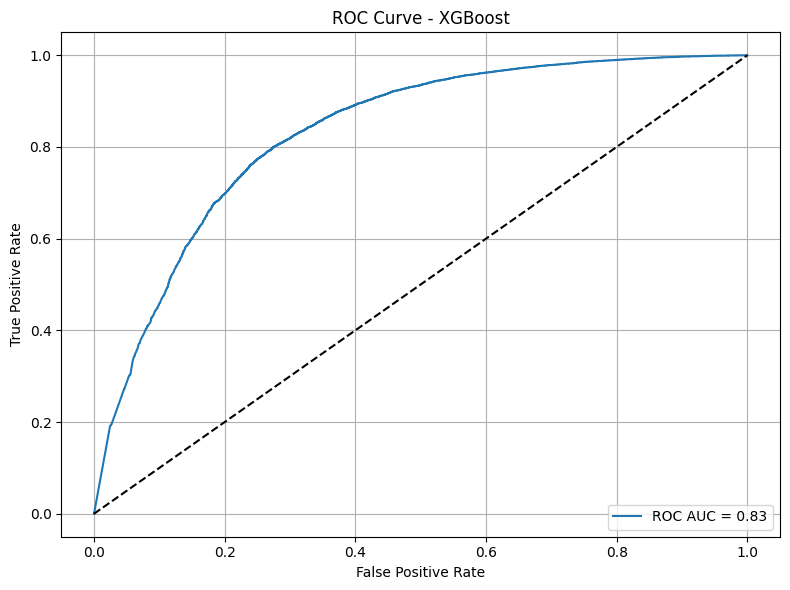

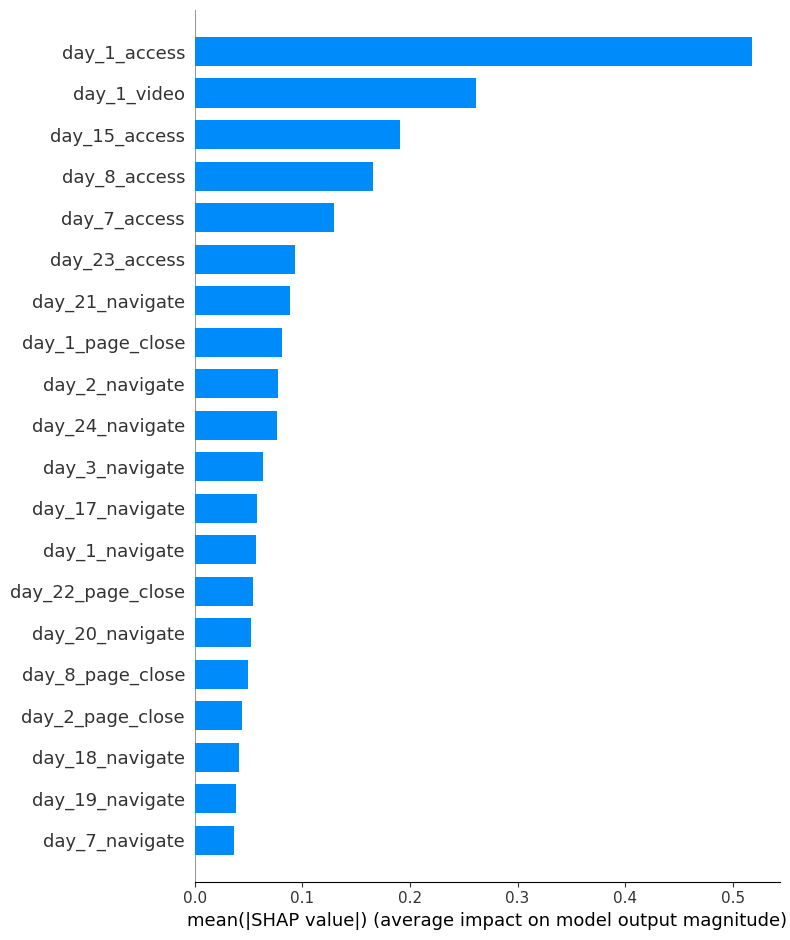

In [18]:
# 🔧 Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt

# 📥 Step 1: Load dataset
df = pd.read_csv("top_30_features_selected.csv")

# 🔎 Step 2: Drop 'enrollment_id' if exists
if 'enrollment_id' in df.columns:
    df = df.drop(columns=['enrollment_id'])

# 🎯 Step 3: Split features and target
X = df.drop(columns=['dropout'])
y = df['dropout']

# 🔀 Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ⚖️ Step 5: Apply SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# 🤖 Step 6: XGBoost + RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    scoring='f1',
    n_iter=10,
    cv=3,
    random_state=42,
    verbose=1
)
search.fit(X_train_bal, y_train_bal)
best_model = search.best_estimator_

# 🧪 Step 7: Evaluation
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# 📊 Print Results
print("✅ Best Hyperparameters:", search.best_params_)
print("\n📊 Confusion Matrix:\n", conf)
print("\n🔍 Classification Report:\n", report)
print(f"\n🎯 Accuracy: {acc:.4f}")
print(f"📈 ROC AUC: {roc_auc:.4f}")

# 📈 Step 8: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# 🔍 Step 9: SHAP Summary Plot (Sampled)
sample_size = 500 if len(X_test) > 500 else len(X_test)
X_test_sample = X_test.sample(sample_size, random_state=42)

explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test_sample)

shap.summary_plot(shap_values, X_test_sample, plot_type="bar")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
✅ Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}

📊 Confusion Matrix:
 [[ 2223  2769]
 [  810 18307]]

🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.45      0.55      4992
           1       0.87      0.96      0.91     19117

    accuracy                           0.85     24109
   macro avg       0.80      0.70      0.73     24109
weighted avg       0.84      0.85      0.84     24109


🎯 Accuracy: 0.8515
📈 ROC AUC: 0.8349


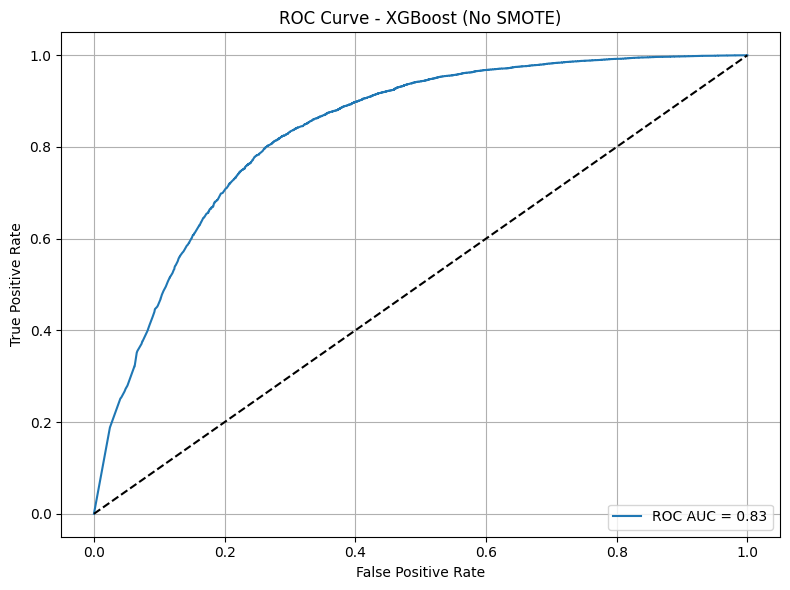

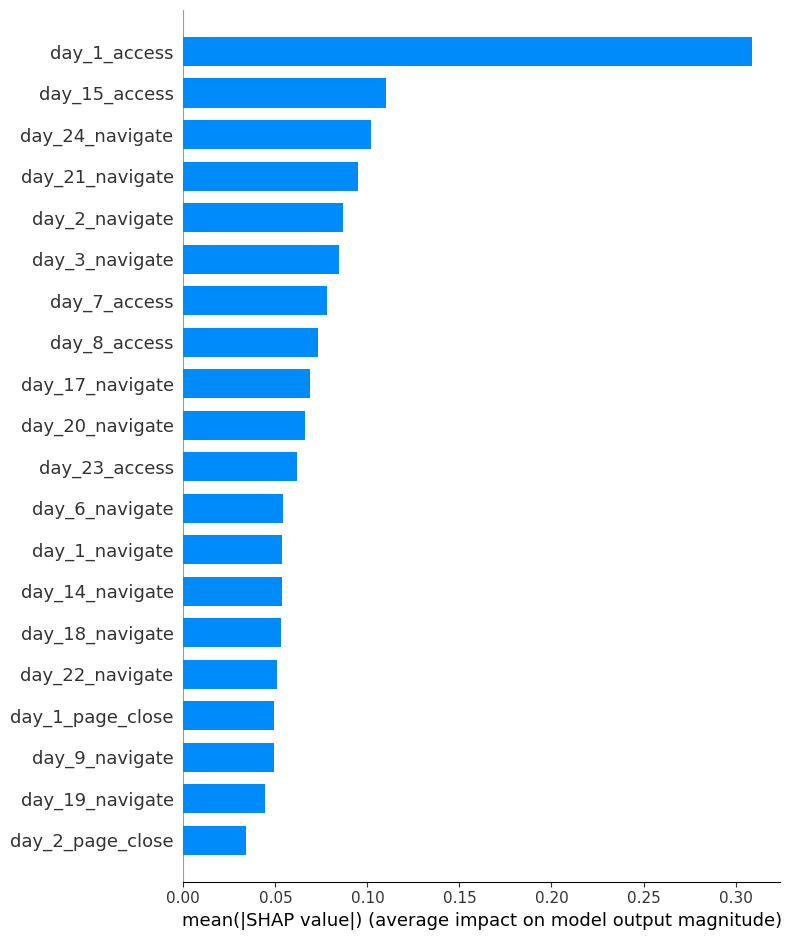

💾 Model saved as 'xgboost_dropout_model_no_smote.pkl'
🔝 Top 10 Features by Importance:
            Feature  Importance
8      day_7_access    0.092197
16    day_15_access    0.084119
11     day_8_access    0.079836
4    day_2_navigate    0.067789
24  day_22_navigate    0.057767
0      day_1_access    0.057665
15  day_14_navigate    0.057168
28  day_24_navigate    0.049459
7    day_6_navigate    0.049156
21  day_19_navigate    0.048343


In [19]:
# 🔧 Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)
from xgboost import XGBClassifier
import shap
import matplotlib.pyplot as plt
import joblib

# 📥 Step 1: Load dataset
df = pd.read_csv("top_30_features_selected.csv")

# 🔎 Step 2: Drop 'enrollment_id' if exists
if 'enrollment_id' in df.columns:
    df = df.drop(columns=['enrollment_id'])

# 🎯 Step 3: Split features and target
X = df.drop(columns=['dropout'])
y = df['dropout']

# 🔀 Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 🤖 Step 5: XGBoost + RandomizedSearchCV (NO SMOTE)
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    scoring='f1',
    n_iter=10,
    cv=3,
    random_state=42,
    verbose=1
)
search.fit(X_train, y_train)
best_model = search.best_estimator_

# 🧪 Step 6: Evaluation
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# 📊 Print Results
print("✅ Best Hyperparameters:", search.best_params_)
print("\n📊 Confusion Matrix:\n", conf)
print("\n🔍 Classification Report:\n", report)
print(f"\n🎯 Accuracy: {acc:.4f}")
print(f"📈 ROC AUC: {roc_auc:.4f}")

# 📈 Step 7: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost (No SMOTE)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# 🔍 Step 8: SHAP Summary Plot (Sampled)
sample_size = 500 if len(X_test) > 500 else len(X_test)
X_test_sample = X_test.sample(sample_size, random_state=42)

explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test_sample)

shap.summary_plot(shap_values, X_test_sample, plot_type="bar")

# 💾 Step 9: Save the model
joblib.dump(best_model, "xgboost_dropout_model_no_smote.pkl")
print("💾 Model saved as 'xgboost_dropout_model_no_smote.pkl'")

# 📋 Step 10: Feature Importance Table
importances = best_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("🔝 Top 10 Features by Importance:")
print(importance_df.head(10))
